Senior Year of HS: [Start] - May 20 2016
    Thanksgiving Break: Nov 21 2015 - Nov 29 2015 
    Christmas Break: Dec 19 2015 - Jan 03 2016
    Spring Break: Mar 19 2016 - Mar 27 2016
    
Summer 2016: May 21 2016 - Aug 19 2016

Freshman Year of College: Aug 22 2016 - May 10 2017
    Thanksgiving Break: Nov 19 2016 - Nov 27 2016
    Christmas Break: Dec 16 2016 - Jan 10 2017
    Spring Break: Mar 11 2017 - Mar 19 2017

Summer 2017: May 11 2017 - Aug 20 2017

Sophomore Year of College: Aug 21 2017 - May 11 2018
    Thanksgiving Break: Nov 18 2017 - Nov 26 2017
    Christmas Break: Dec 16 2017 - Jan 09 2018
    Spring Break: Mar 10 2018 - Mar 18 2018
    
Summer 2018: May 12 2018 - Aug 19 2018

Junior Year of College: Aug 20 2018 - May 09 2019
    Thanksgiving Break: Nov 17 2018 - Nov 25 2018
    Christmas Break: Dec 15 2018 - Jan 08 2018
    Spring Break: Mar 09 2019 - Mar 17 2019
    
Summer 2019: May 10 2019 - Aug 25 2019

Senior Year of College: Aug 26 2019 - May 13 2020
    Thanksgiving Break: Nov 23 2019 - Dec 01 2019
    Christmas Break: Dec 18 2019 - Jan 14 2020
    Spring Break: Mar 12 2020 - Mar 22 2020

In [926]:
from datetime import datetime, timedelta
from matplotlib.dates import date2num
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path
from IPython.display import display
from tqdm.notebook import tqdm

## Event Class

In [413]:
class Event:
    def __init__(self, start_day: int, start_month: int, start_year: int, end_day: int, end_month: int,
                 end_year: int, name: str) -> None:
        """
        
        """
        
        self.start = datetime(day=start_day, month=start_month, year=start_year)
        self.end = datetime(day=end_day, month=end_month, year=end_year)
        self.name = name
        
        assert self.start < self.end, f'Start date {self.start} is after end date {self.end}.'

# Analysis

## Function to create `datetime` object for each row

In [ ]:
def __row_to_datetime(row: dict, time_key: str) -> datetime:        
    """
    Convert a row of the DF to a single combined Datetime object. This adds
    the row's 'Date' value to row's value from `time_key`. If this operation
    fails, just the 'Date' value is returned instead.

    :param

    :param    

    :returns: 
    """

    if time_key not in row:
        raise KeyError(f'Key {time_key} is not a column name of {row}.')

    try:
        return row['Date'] + timedelta(minutes=float(row[time_key]) * 60.0 * 24.0)
    except:
        return row['Date']

## Configuration Variables

### Source filepath

In [957]:
# Read data csv file
file = Path('Media.csv/')

### Chronological Event List

In [992]:
event_list = [
    Event(15, 8,  2015, 20, 5,  2016, 'School'),
#     Event(15, 8,  2015, 20, 5,  2016, 'Senior Year of Highschool'),
    Event(21, 11, 2015, 29, 11, 2015, 'Thanksgiving Break'),
    Event(19, 12, 2015, 3,  1,  2016, 'Christmas Break'),
    Event(19, 3,  2016, 27, 3,  2016, 'Spring Break'),
    Event(21, 5,  2016, 19, 8,  2016, 'Summer Break'),
    Event(22, 8,  2016, 10, 5,  2017, 'School'),
#     Event(22, 8,  2016, 10, 5,  2017, 'Freshman Year of College'),
    Event(19, 11, 2016, 27, 11, 2016, 'Thanksgiving Break'),
    Event(16, 12, 2016, 10, 1,  2017, 'Christmas Break'),
    Event(11, 3,  2017, 19, 3,  2017, 'Spring Break'),
    Event(11, 5,  2017, 20, 8,  2017, 'Summer Break'),
    Event(21, 8,  2017, 11, 5,  2018, 'School'),
#     Event(21, 8,  2017, 11, 5,  2018, 'Sophomore Year of College'),
    Event(18, 11, 2017, 26, 11, 2017, 'Thanksgiving Break'),
    Event(16, 12, 2017, 9,  1,  2019, 'Christmas Break'),
    Event(10, 3,  2018, 18, 3,  2018, 'Spring Break'),
    Event(12, 5,  2018, 19, 8,  2018, 'Summer Break'),
    Event(20, 8,  2018, 9,  5,  2019, 'School'),
#     Event(20, 8,  2018, 9,  5,  2019, 'Junior Year of College'),
    Event(17, 11, 2018, 25, 11, 2018, 'Thanksgiving Break'),
    Event(15, 12, 2018, 8,  1,  2019, 'Christmas Break'),
    Event(9,  3,  2019, 17, 3,  2019, 'Spring Break'),
    Event(10, 5,  2019, 25, 8,  2019, 'Summer Break'),
    Event(26, 8,  2019, 13, 5,  2020, 'School'),
#     Event(26, 8,  2019, 13, 5,  2020, 'Senior Year of College'),
    Event(23, 11, 2019, 1,  12, 2019, 'Thanksgiving Break'),
    Event(18, 12, 2019, 14, 1,  2020, 'Christmas Break'),
    Event(12, 3,  2020, 22, 3,  2020, 'Spring Break'),
]

## Analysis Procedure

### Read CSV File

In [1023]:
df = pd.read_csv(file, na_values='-', usecols=list(range(5)))

### Prune `DataFrame` and convert column types

In [1024]:
# Drop all rows without titles (i.e. no media that day)
df = df[df['Title'].notna()]
df.reset_index(drop=True)

# Forward-fill the dates
df['Date'] = pd.to_datetime(df['Date']).ffill(axis=0)

# Convert Start/End time columns to datetime objects
df['Start Time'] = df.apply(lambda row: row_to_datetime(row, 'Start Time'), axis=1)
df['End Time'] = df.apply(lambda row: row_to_datetime(row, 'End Time'), axis=1)

# Remove all times below minute
df['Start Time'] = df['Start Time'].apply(lambda dt_: dt_.replace(second=0, microsecond=0, nanosecond=0))
df['End Time'] = df['End Time'].apply(lambda dt_: dt_.replace(second=0, microsecond=0, nanosecond=0))

# Delete ['Date'] column
del df['Date']

### Split entries that take place across day boundaries into separate entries

In [1025]:
new_df = df.copy()
across_days = df[df['Start Time'].dt.day != df['End Time'].dt.day]
for index, row in tqdm(across_days.iterrows(), ncols='100%', total=len(across_days)):
    # Get start and end time for this row
    start = row['Start Time']
    end = row['End Time']
    
    # Create row that is goes from (start time) -> (1 minute before midnight)
    until_midnight = dict(row)
    until_midnight['End Time'] = datetime(year=start.year, month=start.month, day=start.day,
                                          hour=23, minute=59, second=59)
    
    # Create row that goes from (midnight) -> (end time)
    after_midnight = dict(row)
    after_midnight['Start Time'] = datetime(year=end.year, month=end.month, day=end.day)
    
    # Convert dict of values like {'Start Time': time} -> {'Start Time': [time]} for DataFrame creation
    until_midnight = {k: [v] for k, v in until_midnight.items()}
    after_midnight = {k: [v] for k, v in after_midnight.items()}
    
    # Append new rows to new_df, ignoring CURRENT row (removing from DataFrame)
    new_df = pd.concat([new_df.iloc[new_df.index != index], pd.DataFrame(until_midnight)])
    new_df = pd.concat([new_df, pd.DataFrame(after_midnight)])
    
df = new_df.copy().sort_values(by=['Start Time'], ignore_index=True)

### Create `Type` column for if the event is a film or show

In [1026]:
# Create ['Type'] for whether it's Film / Show
df['Type'] = df['Episode Title'].isnull().map({True: 'Film', False: 'Show'})

### Set `'Event'` column based on input `event_list`

In [1027]:
df['Event'] = 'General'
for event in tqdm(event_list, ncols='100%'):
    df.loc[(df['Start Time'] >= event.start) & (df['End Time'] <= event.end), 'Event'] = event.name

### Create `DataFrame` (`minute_df`) where each minute of each entry gets a new row

In [1030]:
minute_df = df.copy()
minute_df['Year'] = df['Start Time'].dt.year

for index, row in tqdm(df.iterrows(), ncols='100%', total=len(df)):
    # Create dictionary for the current row
    new_entry = dict(row, Year=row['Start Time'].year)  # Add ['Year'] column
    new_entry = {k: [v] for k, v in new_entry.items()}  # Convert values to [values]
    
    # Remove current row
    minute_df = minute_df.iloc[minute_df.index != index]
    
    # Get start and end times
    start_time = datetime(year=2020, month=1, day=1, hour=row['Start Time'].hour, minute=row['Start Time'].minute)
    end_time = datetime(year=2020, month=1, day=1, hour=row['End Time'].hour, minute=row['End Time'].minute)
    # Go between start and end time 1 minute at a time
    for new_time in pd.period_range(start_time, end_time, freq='T'):
        new_entry['Time'] = [datetime(year=2020, month=1, day=1,
                                      hour=new_time.hour, minute=new_time.minute)]
        
        minute_df = pd.concat([minute_df, pd.DataFrame(new_entry)])
        
# Create ['Time'] column that is the float equivalent of the datetime object
minute_df['Time'] = minute_df['Time'].apply(date2num)

# Delete unused columns
del minute_df['Start Time']
del minute_df['End Time']

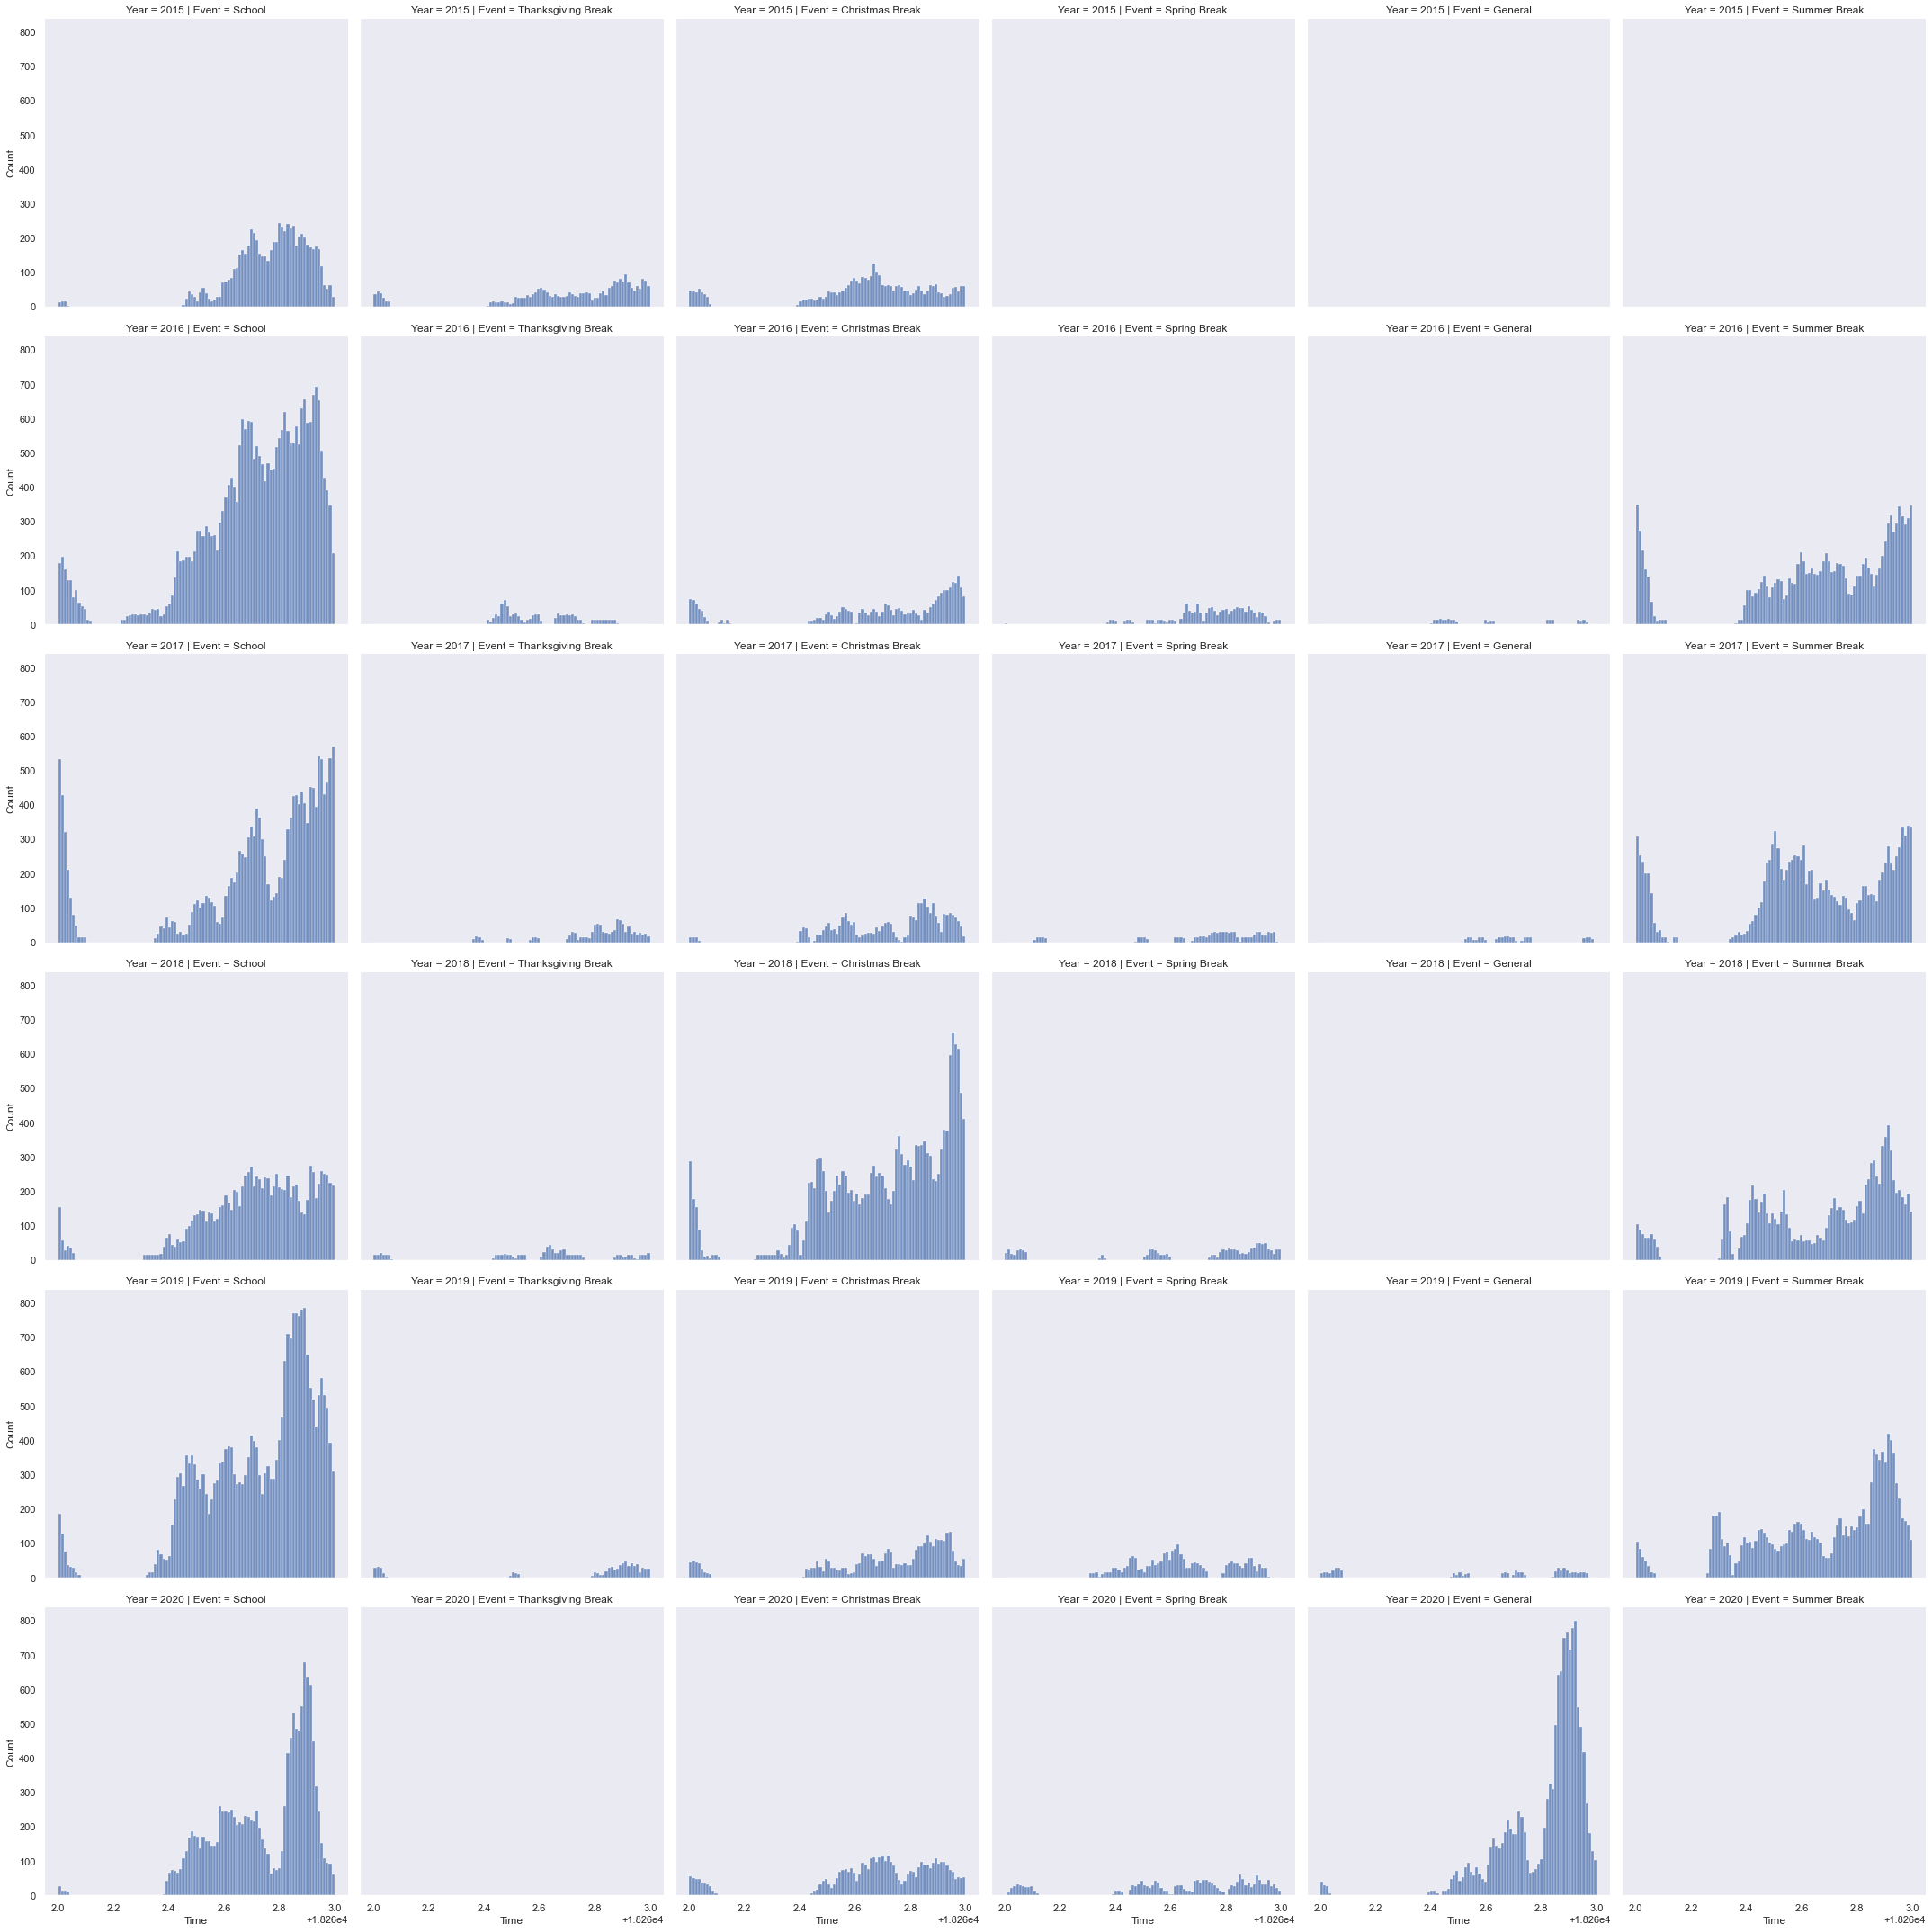

In [1031]:
# pd.options.display.max_rows = 100
sns.displot(data=minute_df, x='Time', col='Event', row='Year');

### Create `'Watched'` column that is how long each entry lasts

In [ ]:
# Create timedelta column ['Watched'] of watch time for each entry
df['Watched'] = df['End Time'] - df['Start Time']

### Get list (`unwatched_times`) of all times with *no* media

In [ ]:
# Create list of all minutes in a day
times = [datetime(year=2020, month=1, day=1) + timedelta(minutes=minutes) for minutes in range(24 * 60)]

# For each minute in the day, count the number of entries where that is contained within
time_counts = [len(df[(df['Start Time'].dt.time <= time.time()) & (df['End Time'].dt.time >= time.time())]) for time in times]

## Plot frequency of each minute

In [ ]:
# Create Dataframe of the times and mapping to how many times that time was in an entry
freq_df = pd.DataFrame({'Time': times, 'Occurence': time_counts})

# Create Figure
fig, ax = plt.subplots(figsize=(14, 10), dpi=400)
sns.lineplot(x='Time', y='Occurence', data=freq_df, grid=False)

# Set x-axis in 24H format at 2 hour intervals
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:00'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))

sns.set(style='dark')
sns.despine(top=True, right=True, left=True, bottom=True)

## Create `DataFrame` for `Seaborn` plot

### Convert Start and End times to number of minutes

In [ ]:
start_minutes = (df['Start Time'].dt.hour * 60.0) + (df['Start Time'].dt.minute)
end_minutes = ((df['End Time'].dt.hour * 60.0) + (df['End Time'].dt.minute))

days, times, events = [], [], []
for start, end, start_dt, event in zip(start_minutes, end_minutes, df['Start Time'], df['Event']):
    days.extend([start_dt.date()] * int(end - start))
    times.extend(list(range(int(start), int(end))))
    events.extend([event] * int(end - start))
    
plot_df = pd.DataFrame({'Days': days, 'Times': times, 'Event': events})

## Plot entries as watch time

In [ ]:
ax = sns.displot(plot_df, x='Days', y='Times', discrete=(True, True), hue='Event', legend=False)
ax.fig.set_figwidth(18)
ax.fig.set_figheight(9)
ax.set(ylim=(0, 24 * 60));

In [856]:
df_small = df[(df['Start Time'].dt.dayofweek < 5)] # Exclude weekends from future DFs
# df_small = df

df_small['Watched'].fillna(pd.Timedelta(seconds=0)) # Fill empty days with 0

# Get series of Events to fill in Event column after grouping
freq = 'D'
new_event = df_small.groupby(pd.Grouper(key='Start Time', freq=freq)).agg({'Event': 'first'})
df_small = df_small.groupby(pd.Grouper(key='Start Time', freq=freq)).sum() # Group and summate Watched column
df_small['Event'] = new_event['Event'] # Place events column back in new data frame

SpecificationError: Column(s) ['Event'] do not exist

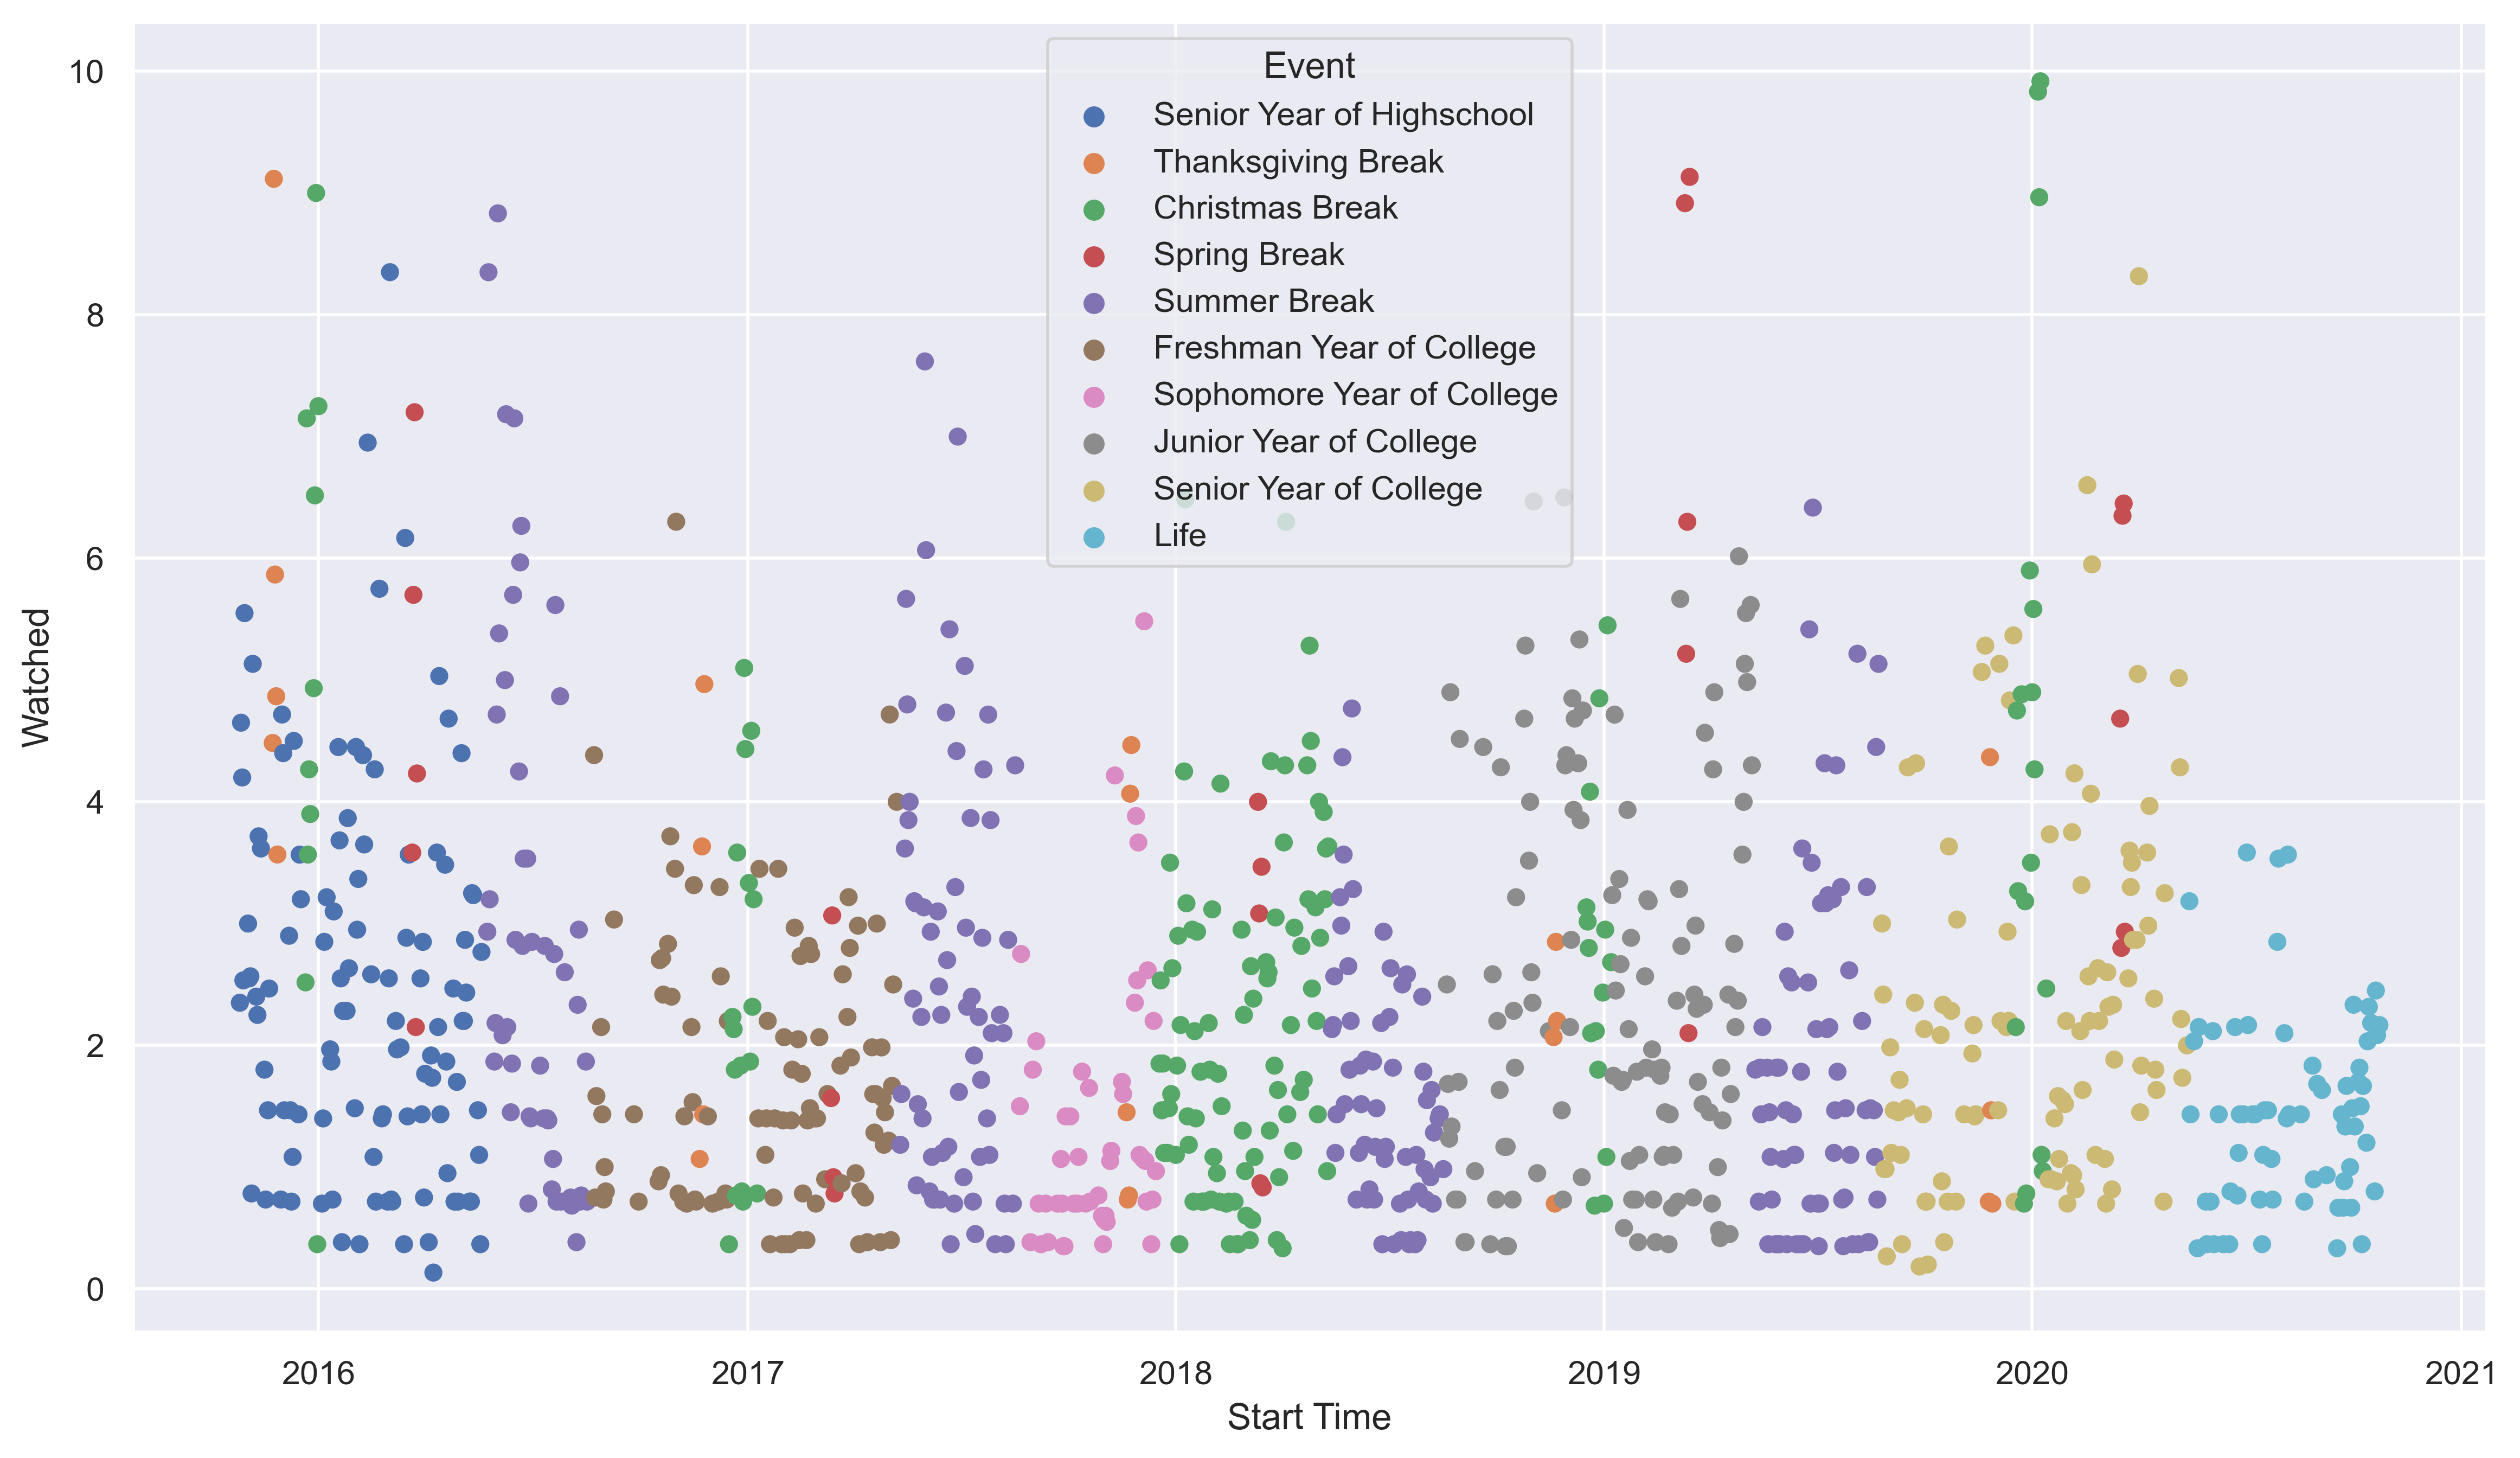

In [853]:
tdf = df_small.reset_index()
tdf['Watched'] = tdf['Watched'].dt.total_seconds() / 60. / 60.
tdf['Year'] = tdf['Start Time'].dt.year

sns.set_theme(style="darkgrid")
sns.despine(f, left=True, bottom=True)

# g = sns.relplot(x='Start Time', y='Watched',
#                 hue='Event',
#                 col='Year', col_wrap=2,
#                 data=tdf,
#                 facet_kws={'sharex': False, 'sharey': True})
# g.tight_layout()

f, ax = plt.subplots(figsize=(14, 8), dpi=400)
sns.scatterplot(x="Start Time", y="Watched",
                hue="Event", linewidth=0,
                data=tdf, ax=ax);

In [850]:
np.sum(df['End Time'] - df['Start Time'])

Timedelta('138 days 09:36:00')